# Twitter Sentiment Analysis of BBC Documentary

### Description of the topic
On January 17, the British Broadcasting Corporation (BBC) released the first episode of ‘The Modi Question’, a two-part documentary series that tracks Prime Minister Narendra Modi’s first steps into politics, including his rise through the ranks of the Bharatiya Janata Party (BJP) to his appointment as Chief Minister of the western State of Gujarat.
The documentary was originally broadcast in the United Kingdom last week but it quickly generated hype here prompting the Indian government to block it from being aired on Indian platforms.

### What is the documentary about? ( About Dataset)

The 59-minute documentary highlights the 2002 Gujarat riots, one of the worst outbreaks of religious violence in India. It shows how the riots broke out after a train carrying Hindu pilgrims in Gujarat was set on fire and killed 59 people. The Muslim community was held allegedly responsible for the incident, leading to heightened attacks and the deaths of more than 1,000 Muslims. The outbreak of violence was one of the worst since Independence in 1947.

PM Modi has long rejected accusations that he had any responsibility for the violence. In 2013, a Supreme Court panel also said there was insufficient evidence to prosecute him.

The documentary reveals a previously unpublished report from the British Foreign Office held Modi “directly responsible” for the “climate of impunity” that enabled the violence and said it had “all the hallmarks of an ethnic cleansing”.

People have been raising their voices on twitter regarding this matter and criticising P.M Modi on his decision quoting the Modi government is taking away media freedom and is trying desperately to suppress facts.

### Objective
The objective of this Notebook is to predict the sentiment of the twitter Users regarding the ban of BCC Documentary by analyzing to their tweets.

### Steps Performed

- Data Scraping using Twitter API
- Data Loading
- Data pre-processing (Tweets cleaning)
- Topic modelling
- Visualization of intertropic distance map
- Wordcloud visualization
- Sentiment analysis
- Conclusion

In [177]:
import numpy as np 
import pandas as pd
import tweepy
import json

# Data scraping using Twitter API and Tweepy Module

In [186]:
search_words ="BBCdocumentary"
date = "2023-01-23" # choose any date with the format "yyyy-mm-dd"
number_posts = 3200

This is the code for scraping the tweets from the twitter API , all the keys here are obtained by changing the personal account to developer account to get access to the tweepy module.

In [187]:


# Authentication keys
consumer_key = "tcjiMzdipSwxYNjIrzITJKaMa"
consumer_secret ="vmXrg00sQzxNk0o0va5vUFC9jHFIHKmkvEzreQj6s7qExp9cmc"
access_token = "1270983233585287169-LfEqdY9tKKLTgoFVKWA7p8WNqnIJCQ"
access_token_secret ="wFQjgXMHOIJtnew2N4ZvKNwWR93L2zQsWHEIr4WRfAJky"

# Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Search for tweets (excluding retweets)
tweets = tweepy.Cursor(api.search_tweets,
                       exclude='retweets',
                       q=search_words,
                       lang="en",
                       since=date).items(number_posts)

all_tweets = []
for tweet in tweets:
    all_tweets.append({
        'created_at': tweet.created_at,
        'text': tweet.text,
        'screen_name': tweet.user.screen_name,
        'location': tweet.user.location
    })

# Create a dataset
tweets_dataset = pd.DataFrame(all_tweets)

# Save dataset to a CSV file
tweets_dataset.to_csv('tweets_dataset.csv', index=False)

Unexpected parameter: exclude
Unexpected parameter: since
Unexpected parameter: exclude
Unexpected parameter: since
Unexpected parameter: exclude
Unexpected parameter: since
Unexpected parameter: exclude
Unexpected parameter: since
Unexpected parameter: exclude
Unexpected parameter: since
Unexpected parameter: exclude
Unexpected parameter: since
Unexpected parameter: exclude
Unexpected parameter: since
Unexpected parameter: exclude
Unexpected parameter: since
Unexpected parameter: exclude
Unexpected parameter: since
Unexpected parameter: exclude
Unexpected parameter: since
Unexpected parameter: exclude
Unexpected parameter: since
Unexpected parameter: exclude
Unexpected parameter: since
Unexpected parameter: exclude
Unexpected parameter: since
Unexpected parameter: exclude
Unexpected parameter: since
Unexpected parameter: exclude
Unexpected parameter: since
Unexpected parameter: exclude
Unexpected parameter: since
Unexpected parameter: exclude
Unexpected parameter: since
Unexpected par

TooManyRequests: 429 Too Many Requests
88 - Rate limit exceeded

The extracted tweets are converted into a dataset 

In [188]:
df_Tweet = pd.DataFrame(all_tweets)
df_Tweet.to_csv('Tweet_data2.csv', index=False,)

In [189]:
df_Tweet.tail()

,created_at,text,screen_name,location
2530,2023-01-23 11:26:29+00:00,@AnneMarieMorris\n@davidmorrisml\nThe #BBCDocu...,Saanvis17,Delhi
2531,2023-01-23 11:25:55+00:00,@jessicamordenmp\n@stephenmorganmp\nAfter the ...,Saanvis17,Delhi
2532,2023-01-23 11:25:39+00:00,@jon_trickett \n@trussliz \nLord Rami Ranger i...,AminaKh94221736,
2533,2023-01-23 11:25:09+00:00,@laylamoran\n@PennyMordaunt\nCasting doubt on ...,Saanvis17,Delhi
2534,2023-01-23 11:24:19+00:00,@Moore4Southport\n@_RobbieMoore\nLord Rami Ran...,Saanvis17,Delhi


# NOTE:
The Twitter API only lets to extract a maximum of 3200 tweets in a 15 minute window. Keeping in mind the rules and restrictions in place to prevent excessive use of the API and to ensure that it remains available for all developers. If the rate limits exceeds , the access to it may be temporarily or permanently suspended.

Only 2543 tweets have been scraped due to the limitations of rate limits on twitter API and is used for analysis

# DATA PRE-Processing

In [190]:
npr = pd.DataFrame(columns=['Article'])
npr['Article']=df_Tweet['text']

In [191]:
npr.head()

,Article
0,Govt. should remove the ban on the #BBCDocumen...
1,#BBCDocumentary\nThe more they hide the more i...
2,Though the government has played out a clampdo...
3,Days after the Centre asked Twitter and YouTub...
4,@ukilaw Pak as dark as blown out bulbs like th...


In [192]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naikv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [193]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [194]:
npr.head()

,Article
0,Govt. should remove the ban on the #BBCDocumen...
1,#BBCDocumentary\nThe more they hide the more i...
2,Though the government has played out a clampdo...
3,Days after the Centre asked Twitter and YouTub...
4,@ukilaw Pak as dark as blown out bulbs like th...


In [195]:
from nltk.corpus import stopwords
stops = stopwords.words("english") 

In [196]:
npr['Article'] = npr.Article.str.replace("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","")           
npr['Article'] = npr.Article.str.replace("[^\w\s]", "").str.lower() # Lowercase       

npr['Article'] = npr.Article.str.replace("[^\w\s]", "").str.lower() # Lowercase
npr['Article']= npr['Article'].apply(lambda x: 
                              ' '.join([item for item in str(x).split() if item not in stops])) # Remove english stopwords
npr['Article'] = npr.Article.str.replace("[^\w\s]", "") # Remove punctuation
npr['Article'] = npr['Article'].str.replace('\d+', '')

In [197]:
npr.tail(10)

,Article
2525,obviously generals forced sign petition show i...
2526,cm gujarat owaisi pm modi govt blocks bbc docu...
2527,inc inc modi declassified netajis file made co...
2528,reality minorities india safe majority n privi...
2529,goi ban government projects ultimate beneficia...
2530,bbcdocumentary series pm modi drawn harsh crit...
2531,airing controversial bbcdocumentary pm narendr...
2532,trickett lord rami ranger letter tim davie men...
2533,casting doubt islamist involvement godhra trai...
2534,robbiemoorelord rami ranger encouraged biasedb...


In [198]:
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation # LDA
from sklearn.model_selection import GridSearchCV

In [199]:
from sklearn.feature_extraction.text import CountVectorizer

In [200]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [201]:
dtm = cv.fit_transform(npr['Article'])

In [202]:
dtm

<2535x2020 sparse matrix of type '<class 'numpy.int64'>'
	with 17548 stored elements in Compressed Sparse Row format>

In [203]:
len(cv.get_feature_names())


2020

In [204]:
import random

In [205]:
for i in range(10):
    random_word_id = random.randint(0,1589)
    print(cv.get_feature_names()[random_word_id])

buy
logic
ready
january
countrys
buy
exactly
instigate
bans
musk


# TOPIC MODELLING

In [206]:
!pip install spacy[medium]

In [208]:
!python -m spacy download en_core_web_md

     --------------------------------------- 42.8/42.8 MB 10.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.5.0/en_core_web_md-3.5.0-py3-none-any.whl (42.8 MB)
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [210]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [211]:
Report_list=npr['Article'].tolist()
print(Report_list[1])
tokenized_reports = lemmatization(Report_list)
print(tokenized_reports[1])

bbcdocumentarythe hide getting trending
['bbcdocumentarythe']


In [212]:
dictionary = corpora.Dictionary(tokenized_reports)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reports]

In [213]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [214]:
lda_model.print_topics()

[(0,
  '0.061*"bbcdocumentary" + 0.019*"medium" + 0.014*"indian" + 0.011*"leader" + 0.010*"true" + 0.010*"movie" + 0.008*"documentary" + 0.008*"story" + 0.007*"britisher" + 0.007*"nation"'),
 (1,
  '0.071*"bbcdocumentary" + 0.028*"file" + 0.015*"gujarat" + 0.012*"kashmiri" + 0.012*"role" + 0.010*"world" + 0.009*"propaganda" + 0.009*"man" + 0.009*"last" + 0.008*"ban"'),
 (2,
  '0.063*"bbcdocumentary" + 0.032*"documentary" + 0.029*"people" + 0.028*"time" + 0.025*"truth" + 0.018*"reason" + 0.017*"present" + 0.016*"video" + 0.014*"familiar" + 0.013*"government"'),
 (3,
  '0.159*"bbcdocumentary" + 0.022*"question" + 0.019*"history" + 0.016*"student" + 0.014*"propaganda" + 0.010*"pm" + 0.010*"bjp" + 0.010*"minister" + 0.009*"hindu" + 0.009*"screen"'),
 (4,
  '0.112*"bbcdocumentary" + 0.055*"riot" + 0.052*"documentary" + 0.043*"video" + 0.041*"thing" + 0.038*"communal" + 0.019*"bbc" + 0.011*"power" + 0.011*"link" + 0.010*"ban"')]

In [215]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.153902 -0.148586       1        1  24.262392
2      0.127541  0.132520       2        1  21.233868
3     -0.082458 -0.084447       3        1  20.732954
1     -0.157237 -0.027697       4        1  18.154371
0     -0.041748  0.128210       5        1  15.616416, topic_info=            Term        Freq       Total Category  logprob  loglift
136         riot  135.000000  135.000000  Default  30.0000  30.0000
762        thing  102.000000  102.000000  Default  29.0000  29.0000
842     communal   94.000000   94.000000  Default  28.0000  28.0000
9    documentary  208.000000  208.000000  Default  27.0000  27.0000
273        video  140.000000  140.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
264   propaganda    9.652829   62.841329   Topic5  -5.0985  -0.0165
141     colonial    6.793637   16.951774   Topic5  -5.4497   0.9425
526        today    6.867803   18.280504   Topic5  -5.4389   0.8779
129  gujaratriot    7.588432   37.468945   Topic5  -5.3391   0.2600
3           govt    7.358858   43.140072   Topic5  -5.3698   0.0883

[252 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
346       3  0.885505          action
1932      3  0.970281  administration
332       1  0.913541          agenda
155       5  0.896213           alive
81        1  0.890912         archive
...     ...       ...             ...
120       1  0.167477           world
120       4  0.636413           world
120       5  0.200973           world
38        2  0.708886            year
38        4  0.261169            year

[282 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 2, 1])

In [216]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reports, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.578974904595284

Coherence Score:  0.5291759329527691


In [217]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [219]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reports, start=2, limit=10, step=1)


# Optimal number of topics

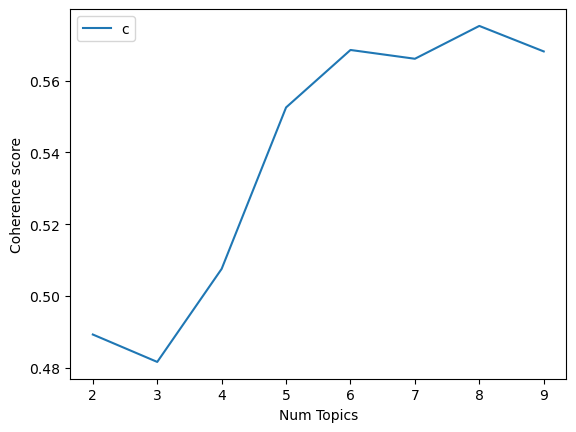

In [220]:
# Show graph
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [221]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4893
Num Topics = 3  has Coherence Value of 0.4816
Num Topics = 4  has Coherence Value of 0.5076
Num Topics = 5  has Coherence Value of 0.5525
Num Topics = 6  has Coherence Value of 0.5686
Num Topics = 7  has Coherence Value of 0.5661
Num Topics = 8  has Coherence Value of 0.5753
Num Topics = 9  has Coherence Value of 0.5682


Number of topics = 8 has more coherence value, hence topics = 8 is optimal

In [223]:
# Select the model and print the topics
optimal_model = model_list[6]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.100*"bbcdocumentary" + 0.066*"documentary" + 0.025*"government" + 0.018*"bbc" + 0.018*"emergency" + 0.017*"power" + 0.014*"good" + 0.011*"bjp" + 0.011*"boycott" + 0.009*"bhakts"'),
 (1,
  '0.178*"bbcdocumentary" + 0.034*"riot" + 0.029*"documentary" + 0.022*"video" + 0.019*"communal" + 0.017*"thing" + 0.012*"tweet" + 0.009*"link" + 0.008*"ban" + 0.007*"gujarat"'),
 (2,
  '0.083*"bbcdocumentary" + 0.017*"country" + 0.015*"administration" + 0.014*"british" + 0.014*"pm" + 0.010*"student" + 0.009*"interview" + 0.009*"former" + 0.009*"archive" + 0.009*"reporting"'),
 (3,
  '0.105*"bbcdocumentary" + 0.029*"medium" + 0.029*"propaganda" + 0.024*"question" + 0.019*"gujaratriot" + 0.013*"criticism" + 0.011*"last" + 0.011*"documentary" + 0.009*"moment" + 0.009*"fake"'),
 (4,
  '0.095*"bbcdocumentary" + 0.031*"people" + 0.021*"truth" + 0.019*"man" + 0.014*"time" + 0.014*"powerful" + 0.013*"jail" + 0.013*"much" + 0.010*"reason" + 0.009*"video"'),
 (5,
  '0.030*"file" + 0.028*"britisher" + 

In [224]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.036690 -0.016752       1        1  19.645884
0      0.082354  0.149475       2        1  14.768919
3      0.000170 -0.117828       3        1  13.532323
4      0.008653 -0.088187       4        1  12.569633
6      0.047410 -0.005824       5        1  11.325018
2     -0.003297  0.005029       6        1  10.043124
7      0.045613  0.020903       7        1   9.768143
5     -0.217593  0.053186       8        1   8.346957, topic_info=                Term         Freq        Total Category  logprob  loglift
9        documentary   238.000000   238.000000  Default  30.0000  30.0000
1     bbcdocumentary  1044.000000  1044.000000  Default  29.0000  29.0000
84              file    37.000000    37.000000  Default  28.0000  28.0000
1548       britisher    24.000000    24.000000  Default  27.0000  27.0000
136             riot    99.000000    99.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
54               new     4.846058    19.308634   Topic8  -5.1611   1.1009
141         colonial     4.572998    21.137270   Topic8  -5.2191   0.9524
1     bbcdocumentary     6.677977  1044.068831   Topic8  -4.8405  -2.5688
949            happy     3.989472     7.348316   Topic8  -5.3556   1.8725
526            today     3.978749    19.991100   Topic8  -5.3583   0.8690

[457 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1895      7  0.925483        able
1790      3  0.861708  acceptable
2152      3  0.805563      access
794       1  0.181232     account
794       8  0.724928     account
...     ...       ...         ...
38        3  0.239547        year
38        6  0.149717        year
38        7  0.089830        year
38        8  0.299434        year
631       5  0.809302          yr

[815 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 5, 7, 3, 8, 6])

# Interpretation and choosing best model

The coherence score for the model with 5 topics is 0.5525 and the coherence score for the model with 8 topics is 0.5753. While the coherence score for the model with 8 topics is slightly higher, the model with 5 topics is producing distinct topics and the model with 8 topics is producing overlapping topics.

It's important to consider the interpretability and meaningfulness of the topics produced by the model. Distinct and non-overlapping topics are generally considered to be more interpretable and meaningful than overlapping topics. In this case, the model with 5 topics producing distinct topics could be considered better than the model with 8 topics producing overlapping topics, even if the coherence score for the model with 8 topics is slightly higher.

So we continue the topic modelling with number of topics=5.

In [231]:
LDA2 = LatentDirichletAllocation(n_components=5,random_state=42)

In [232]:
LDA2.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=42)

In [233]:
LDA2.components_

array([[0.20090818, 3.1999807 , 4.19903111, ..., 0.20398974, 0.2000049 ,
        0.20000196],
       [0.2020981 , 0.20000351, 0.20000453, ..., 0.20000565, 0.20000536,
        0.20000205],
       [6.19549329, 0.20000517, 0.20000669, ..., 0.20000808, 0.20000742,
        0.20000314],
       [0.20001458, 0.20000647, 0.20095217, ..., 0.20001125, 9.14877174,
        2.19999058],
       [0.20148585, 0.20000415, 0.2000055 , ..., 2.19598528, 1.25121058,
        0.20000227]])

In [234]:
LDA2.components_.shape

(5, 2020)

In [235]:
single_topic = LDA2.components_[0]

In [236]:
single_topic.argsort()

array([1661, 1027,  309, ...,  157,  538,  154], dtype=int64)

In [237]:
single_topic.argsort()[-10:]

array([1414,  650, 1393, 1148, 1347,  890, 1160,  157,  538,  154],
      dtype=int64)

In [238]:
top_word_indices = single_topic.argsort()[-10:]

In [239]:
dtm.shape

(2535, 2020)

In [240]:
topic_results = LDA2.transform(dtm)

In [241]:
topic_results.shape

(2535, 5)

In [252]:
topic_results[1]

array([0.04136708, 0.7371873 , 0.13806118, 0.04207307, 0.04131137])

In [253]:
topic_results[1].round(2)

array([0.04, 0.74, 0.14, 0.04, 0.04])

In [254]:
topic_results[1].argmax()

1

In [255]:
topic_results.argmax(axis=1)

array([1, 1, 0, ..., 3, 2, 0], dtype=int64)

In [256]:
npr['Topic'] = topic_results.argmax(axis=1)

In [257]:
npr.tail(10)

,Article,Topic
2525,obviously generals forced sign petition show i...,1
2526,cm gujarat owaisi pm modi govt blocks bbc docu...,0
2527,inc inc modi declassified netajis file made co...,2
2528,reality minorities india safe majority n privi...,1
2529,goi ban government projects ultimate beneficia...,0
2530,bbcdocumentary series pm modi drawn harsh crit...,4
2531,airing controversial bbcdocumentary pm narendr...,2
2532,trickett lord rami ranger letter tim davie men...,3
2533,casting doubt islamist involvement godhra trai...,2
2534,robbiemoorelord rami ranger encouraged biasedb...,0


The topic modelling of topics coded 0,1,2,3,4 is successfull

# WORDCLOUD

In [259]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

In [260]:
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naikv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


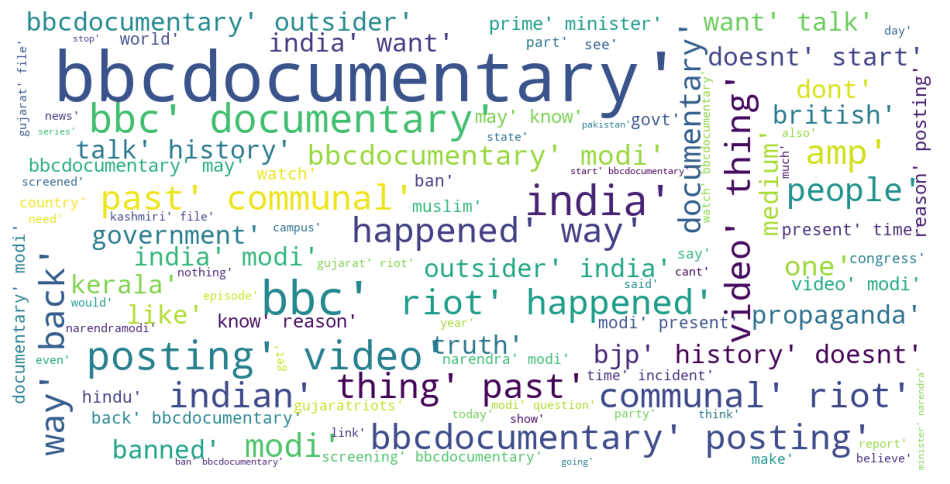

In [261]:
warnings.filterwarnings('ignore')
plot_wordcloud(npr['Article'])

A word cloud (also known as a tag cloud) is a visual representation of the most frequently occurring words in a text or a dataset. It is a way to visualize the most important words in a text by displaying them in a way that the size of the word corresponds to its frequency.

Typically, the words that appear more frequently in a text are displayed in a larger font size, and the words that appear less frequently are displayed in a smaller font size. The word cloud can be used to quickly identify the main themes or topics in a text, as the most frequently occurring words are often the most important ones

# SENTIMENT ANALYSIS

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is a pre-trained model that can be used to classify text as having a positive, negative, or neutral sentiment.

VADER uses a combination of lexical heuristics and a trained model to determine the sentiment of text. It looks at the words used in the text, as well as the context and grammar, to determine the overall sentiment. It uses a combination of positive, negative, and neutral words to determine the sentiment of the text.

In [262]:
npr.rename(columns={'Article': 'tweet'}, inplace=True)

In [263]:
npr.tail()

,tweet,Topic
2530,bbcdocumentary series pm modi drawn harsh crit...,4
2531,airing controversial bbcdocumentary pm narendr...,2
2532,trickett lord rami ranger letter tim davie men...,3
2533,casting doubt islamist involvement godhra trai...,2
2534,robbiemoorelord rami ranger encouraged biasedb...,0


In [265]:
textblob1 = TextBlob(npr["tweet"][0])
print("BBCdocumentary :",textblob1.sentiment)

BBCdocumentary : Sentiment(polarity=0.0, subjectivity=0.0)


In [266]:
def find_pol(review):
    return TextBlob(review).sentiment.polarity

In [267]:
npr["Sentiment Polarity"] = npr["tweet"].apply(find_pol)

In [268]:
npr.tail(10)

,tweet,Topic,Sentiment Polarity
2525,obviously generals forced sign petition show i...,1,-0.15
2526,cm gujarat owaisi pm modi govt blocks bbc docu...,0,0.00
2527,inc inc modi declassified netajis file made co...,2,0.00
2528,reality minorities india safe majority n privi...,1,0.50
2529,goi ban government projects ultimate beneficia...,0,0.00
2530,bbcdocumentary series pm modi drawn harsh crit...,4,-0.20
2531,airing controversial bbcdocumentary pm narendr...,2,0.55
2532,trickett lord rami ranger letter tim davie men...,3,0.00
2533,casting doubt islamist involvement godhra trai...,2,0.00
2534,robbiemoorelord rami ranger encouraged biasedb...,0,0.00


In [269]:
npr["Expression Label"] = np.where(npr["Sentiment Polarity"]>0, "positive", "negative")

In [270]:
npr["Expression Label"] = np.where(npr["Sentiment Polarity"]==0, "neutral",npr["Expression Label"])

In [271]:
npr.tail(10)

,tweet,Topic,Sentiment Polarity,Expression Label
2525,obviously generals forced sign petition show i...,1,-0.15,negative
2526,cm gujarat owaisi pm modi govt blocks bbc docu...,0,0.00,neutral
2527,inc inc modi declassified netajis file made co...,2,0.00,neutral
2528,reality minorities india safe majority n privi...,1,0.50,positive
2529,goi ban government projects ultimate beneficia...,0,0.00,neutral
2530,bbcdocumentary series pm modi drawn harsh crit...,4,-0.20,negative
2531,airing controversial bbcdocumentary pm narendr...,2,0.55,positive
2532,trickett lord rami ranger letter tim davie men...,3,0.00,neutral
2533,casting doubt islamist involvement godhra trai...,2,0.00,neutral
2534,robbiemoorelord rami ranger encouraged biasedb...,0,0.00,neutral


Now we have to filter out the neutral data and keep only positive and negative expression labelled tweets for a better analysis

In [274]:
filter=npr['Expression Label']!='neutral'
data=npr[filter]

In [275]:
data.tail(10)

,tweet,Topic,Sentiment Polarity,Expression Label
2509,azarofflord ranger stated producer bbcdocument...,0,-0.300000,negative
2511,ironyopposition believes bbc boring broadcasti...,4,-0.500000,negative
2512,could bbcdocumentary propaganda may becould mi...,0,-0.050000,negative
2513,lord rami ranger emphasised one right divide u...,0,0.342857,positive
2522,lord ranger stated producer bbcdocumentary lac...,0,-0.300000,negative
2524,people supporting modi bbcdocumentary people s...,4,0.250000,positive
2525,obviously generals forced sign petition show i...,1,-0.150000,negative
2528,reality minorities india safe majority n privi...,1,0.500000,positive
2530,bbcdocumentary series pm modi drawn harsh crit...,4,-0.200000,negative
2531,airing controversial bbcdocumentary pm narendr...,2,0.550000,positive


# EDA

In [278]:
npr.shape

(2535, 4)

In [279]:
data.shape

(1200, 4)

In [280]:
data['Expression Label'].value_counts()

positive    659
negative    541
Name: Expression Label, dtype: int64

In [281]:
positive=(data['Expression Label'].value_counts()[0]/(659+541))*100
positive

54.91666666666667

In [282]:
neg=100-positive
neg

45.08333333333333

In [283]:
import plotly.graph_objects as go
import plotly.express as px


In [284]:
key=['BBC Documentary']
list_pos = [positive]
list_neg = [neg]

In [285]:
fig = go.Figure(data=[
    go.Bar(name='Positive', x=key, y=list_pos),
    go.Bar(name='Negative', x=key, y=list_neg)
])
fig.show()

# Conclusion

Based on the sentiment analysis of the tweets about the BBC documentary, it appears that a majority of the tweets (54.916%) have a positive sentiment. The remaining tweets have a negative sentiment(45.0833 %).

This suggests that overall, the majority of twitter users who have tweeted regarding the topic have a positive perception of the decision taken by Prime Minister Narendra Modi on BBC documentary. 

However we cannot ignore the fact that the negative tweets amongst the tweets scraped from twitter also amounts to 45.0833% which is a pretty high number. Taking into consideration that only about 2700 tweets were extracted and this data does not contain all the tweets regarding the topic, the conclusion may be biased.

From the given analysis, we can conclude that there is almost a 50-50 proportions between the people who support the decision and those who dont.